In [2]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from typing import List, Tuple

In [3]:
plt.rcParams['figure.figsize']  = (10, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['figure.titlesize'] = 24
plt.rcParams['xtick.minor.size'] = 0
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0

In [4]:

def read_stress_results(
    result_path: str,
    input_examples: List[str] = ['E1', 'I1', 'H1'],
    num_simuls: int = 10,
) -> Tuple[List[float], List[float]]:
    results_dir = f"./results/{result_path}"
    min_logs = 1
    max_logs = 10
    num_logs_ls = np.geomspace(min_logs, max_logs, int(np.log10(max_logs)) + 1).astype(int)

    times_agg = []
    iterations_agg = []
    for input_example in input_examples:
        times = []
        iterations = []
        for simul_num in range(1, num_simuls):
            test_result = open(f"{results_dir}/{input_example}-{simul_num}").read().split()
            if(result_path != 'I'):
                times.append(float(test_result[10]))  
                iterations.append(float(test_result[9]))  
            else:
                times.append(float(test_result[11]))  
                iterations.append(float(test_result[10]))  
        times_agg.append(np.mean(times))
        iterations_agg.append(np.mean(iterations))
    
    return times_agg, iterations_agg

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Union

def plot_comparison(
    lists: List[List[float]],
    labels: List[str],
    title: str = None,
    xlabel: str = "Difficulty",
    ylabel: str = "Time (ms)",
    xticks: Union[List[float], None] = None,
    yticks: Union[List[float], None] = None,
    yticklabels: Union[List[str], None] = None,
    legend_loc: Union[str, tuple] = 'upper left',  # Posição padrão da legenda
    legend_bbox: tuple = (1.05, 1),  # Posição da legenda fora do gráfico
    output: Union[str, None] = None,
) -> None:
    num_bars = len(lists)
    num_groups = len(lists[0])
    bar_width = 0.35
    index = np.arange(num_groups)

    fig, ax = plt.subplots()
    if title is not None:
        ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=25)
    ax.set_ylabel(ylabel, fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)

    color_sequence = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"][:num_bars]
    for i, data in enumerate(lists):
        ax.bar(index + i * bar_width / num_bars, data, bar_width / num_bars, label=labels[i], color=color_sequence[i])

    ax.set_xticks(index + bar_width / 2)
    if xticks is not None:
        ax.set_xticklabels(xticks)
    else:
        ax.set_xticklabels(['Easy', 'Intermediate', 'Hard'])
    

    if yticks is not None:
        ax.set_yticks(yticks)
    if yticklabels is not None:
        ax.set_yticklabels(yticklabels, fontsize=20) 

    ax.legend(loc=legend_loc, bbox_to_anchor=legend_bbox)
    ax.set_yscale('log') 
    if output is not None:
        plt.savefig(output, bbox_inches='tight')  # Ajuste para garantir que a legenda não seja cortada
    else:
        plt.show()


## Stress tests

In [6]:
A_times, A_iterations = read_stress_results("A")
B_times, B_iterations = read_stress_results("B")
I_times, I_iterations = read_stress_results("I")
U_times, U_iterations = read_stress_results("U")
G_times, G_iterations = read_stress_results("G")


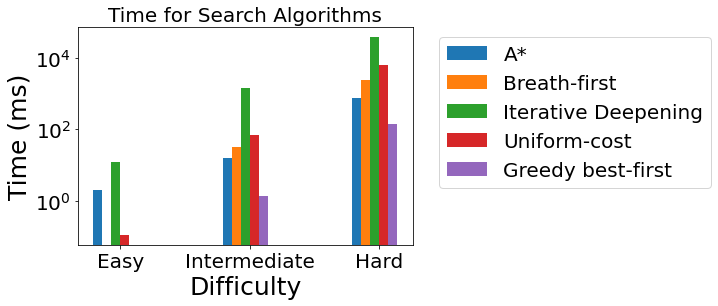

In [7]:
plot_comparison(
    [
        A_times,
        B_times,
        I_times,
        U_times,
        G_times,
    ],
    [
        "A*",
        "Breath-first",
        "Iterative Deepening",
        "Uniform-cost",
        "Greedy best-first",
    ],
    title="Time for Search Algorithms",
    output="./StressTestTime.png"
)

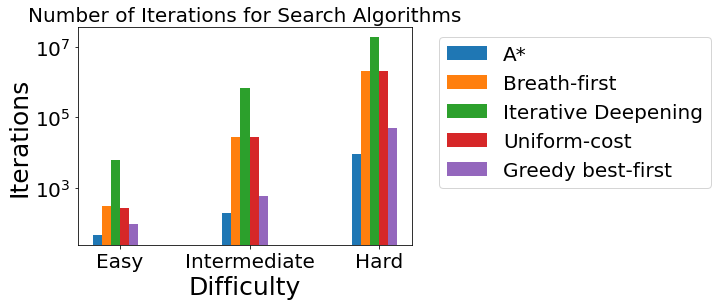

In [8]:
plot_comparison(
    [
        A_iterations,
        B_iterations,
        I_iterations,
        U_iterations,
        G_iterations,
    ],
    [
        "A*",
        "Breath-first",
        "Iterative Deepening",
        "Uniform-cost",
        "Greedy best-first",
    ],
    ylabel="Iterations",
    title="Number of Iterations for Search Algorithms",
    output="./StressTestIterations.png"
)